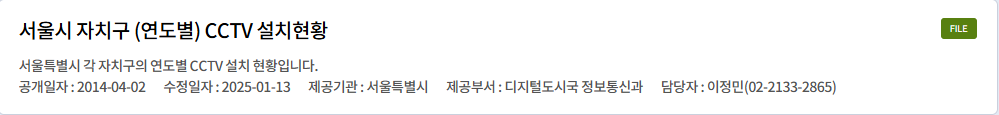
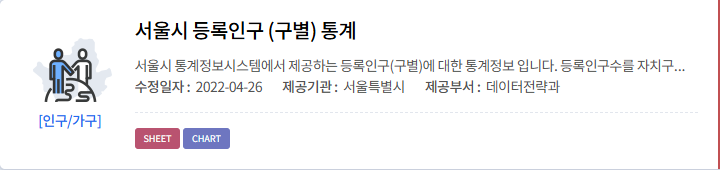
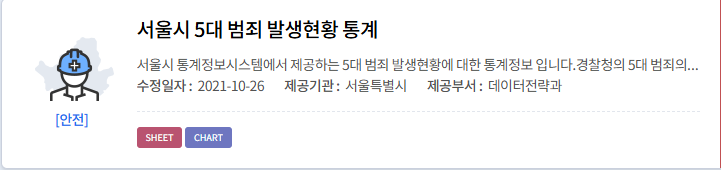

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # 한글폰트
# plt.rcParams["font.family"] = "Malgun Gothic"
# # - 요소 설정
# plt.rcParams["axes.unicode_minus"] = False
import koreanize_matplotlib

import warnings
warnings.simplefilter("ignore")

In [97]:
cctv_df = pd.read_excel("./resources/cctv.xlsx", skiprows=2, usecols="C,E:N")
cctv_df.tail()

,구분,2015년 이전 설치된 CCTV,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
22,서초구,679.0,511.0,1019.0,416.0,332.0,419.0,565.0,882.0,469.0,744.0
23,강남구,590.0,1119.0,918.0,721.0,735.0,909.0,571.0,527.0,923.0,1339.0
24,송파구,366.0,133.0,233.0,517.0,1042.0,235.0,148.0,372.0,940.0,679.0
25,강동구,725.0,202.0,273.0,377.0,356.0,614.0,262.0,381.0,359.0,689.0
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
cctv_df.drop(index=26)
# cctv_df = cctv_df.dropna()
cctv_df.dropna(inplace=True)

In [99]:
cctv_df.tail()

,구분,2015년 이전 설치된 CCTV,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
21,관악구,935.0,601.0,668.0,662.0,889.0,402.0,550.0,138.0,744.0,1025.0
22,서초구,679.0,511.0,1019.0,416.0,332.0,419.0,565.0,882.0,469.0,744.0
23,강남구,590.0,1119.0,918.0,721.0,735.0,909.0,571.0,527.0,923.0,1339.0
24,송파구,366.0,133.0,233.0,517.0,1042.0,235.0,148.0,372.0,940.0,679.0
25,강동구,725.0,202.0,273.0,377.0,356.0,614.0,262.0,381.0,359.0,689.0


In [100]:
cctv_df.head()

,구분,2015년 이전 설치된 CCTV,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
0,계,9702.0,8827.0,10108.0,10594.0,12562.0,11865.0,9358.0,9397.0,13857.0,17003.0
1,종로구,146.0,76.0,115.0,137.0,68.0,231.0,86.0,234.0,924.0,322.0
2,중 구,356.0,219.0,366.0,385.0,159.0,352.0,416.0,137.0,135.0,593.0
3,용산구,24.0,124.0,454.0,119.0,335.0,625.0,431.0,457.0,411.0,629.0
4,성동구,1295.0,228.0,881.0,383.0,477.0,386.0,294.0,170.0,320.0,204.0


In [101]:
# 계 행 제거

cctv_df.drop(index=0, inplace=True)

In [102]:
cctv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 1 to 25
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   구분                  25 non-null     object 
 1   2015년 이전 설치된 CCTV   25 non-null     float64
 2   2016년               25 non-null     float64
 3   2017년               25 non-null     float64
 4   2018년               25 non-null     float64
 5   2019년               25 non-null     float64
 6   2020년               25 non-null     float64
 7   2021년               25 non-null     float64
 8   2022년               25 non-null     float64
 9   2023년               25 non-null     float64
 10  2024년               25 non-null     float64
dtypes: float64(10), object(1)
memory usage: 2.3+ KB


In [103]:
cctv_df.describe()

,2015년 이전 설치된 CCTV,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
count,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,388.080000,353.08000,404.320000,423.760000,502.480000,474.600000,374.320000,375.880000,554.280000,680.120000
std,337.054635,344.37406,268.327959,210.391556,310.817084,276.041965,191.629573,181.816831,232.394334,339.852826
min,0.000000,3.00000,1.000000,119.000000,66.000000,154.000000,31.000000,124.000000,135.000000,80.000000
25%,92.000000,160.00000,196.000000,259.000000,314.000000,298.000000,213.000000,234.000000,415.000000,572.000000
50%,356.000000,228.00000,366.000000,385.000000,366.000000,391.000000,407.000000,363.000000,441.000000,621.000000
75%,590.000000,453.00000,553.000000,539.000000,735.000000,595.000000,545.000000,483.000000,744.000000,855.000000
max,1295.000000,1563.00000,1019.000000,823.000000,1070.000000,1307.000000,744.000000,882.000000,993.000000,1352.000000


In [82]:
# 컬럼 정리
# 구분 => 구 별, '2015년 이전 설치된 CCTV ' => 2015년 이전 : rename
# 2020년 이전 컴럼 생성 : 2015이전 + 2016 + 2017 + 2018 + 2019 + 2020
cctv_df.columns

Index(['구분', '2015년 이전 설치된 CCTV ', '2016년', '2017년', '2018년', '2019년', '2020년',
       '2021년', '2022년', '2023년', '2024년'],
      dtype='object')

In [104]:
cctv_df.rename(columns={"구분":"구 별", "2015년 이전 설치된 CCTV ":"2015년 이전"}, inplace=True)

In [105]:
cctv_df.head(3)

,구 별,2015년 이전,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
1,종로구,146.0,76.0,115.0,137.0,68.0,231.0,86.0,234.0,924.0,322.0
2,중 구,356.0,219.0,366.0,385.0,159.0,352.0,416.0,137.0,135.0,593.0
3,용산구,24.0,124.0,454.0,119.0,335.0,625.0,431.0,457.0,411.0,629.0


In [106]:
# 첫번째 방법
cctv_df["2020년 이전"] = cctv_df["2015년 이전"] + cctv_df["2016년"] + cctv_df["2017년"] + cctv_df["2018년"] + cctv_df["2019년"] + cctv_df["2020년"]

In [109]:
cctv_df.head()

,구 별,2015년 이전,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년,2020년 이전
1,종로구,146.0,76.0,115.0,137.0,68.0,231.0,86.0,234.0,924.0,322.0,773.0
2,중 구,356.0,219.0,366.0,385.0,159.0,352.0,416.0,137.0,135.0,593.0,1837.0
3,용산구,24.0,124.0,454.0,119.0,335.0,625.0,431.0,457.0,411.0,629.0,1681.0
4,성동구,1295.0,228.0,881.0,383.0,477.0,386.0,294.0,170.0,320.0,204.0,3650.0
5,광진구,247.0,38.0,660.0,465.0,710.0,194.0,744.0,276.0,348.0,954.0,2314.0


In [86]:
# 두번째 방법 : sum()

cctv_df["2020년 이전"] = cctv_df[['2015년 이전', '2016년', '2017년', '2018년', '2019년', '2020년']].sum(axis=1)

In [87]:
# cctv_df.drop(columns="2020년 이전", inplace=True)

In [110]:
cctv_df.head(3)

,구 별,2015년 이전,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년,2020년 이전
1,종로구,146.0,76.0,115.0,137.0,68.0,231.0,86.0,234.0,924.0,322.0,773.0
2,중 구,356.0,219.0,366.0,385.0,159.0,352.0,416.0,137.0,135.0,593.0,1837.0
3,용산구,24.0,124.0,454.0,119.0,335.0,625.0,431.0,457.0,411.0,629.0,1681.0


In [111]:
cctv_df.columns.difference(["구 별"])

Index(['2015년 이전', '2016년', '2017년', '2018년', '2019년', '2020년', '2020년 이전',
       '2021년', '2022년', '2023년', '2024년'],
      dtype='object')

In [112]:
# 명시된 column 제외하고 출력
cctv_df[cctv_df.columns.difference(["구 별",'2021년', '2022년', '2023년', '2024년'])]

,2015년 이전,2016년,2017년,2018년,2019년,2020년,2020년 이전
1,146.0,76.0,115.0,137.0,68.0,231.0,773.0
2,356.0,219.0,366.0,385.0,159.0,352.0,1837.0
3,24.0,124.0,454.0,119.0,335.0,625.0,1681.0
4,1295.0,228.0,881.0,383.0,477.0,386.0,3650.0
5,247.0,38.0,660.0,465.0,710.0,194.0,2314.0
6,0.0,1563.0,136.0,197.0,209.0,223.0,2328.0
7,541.0,160.0,182.0,209.0,1070.0,992.0,3154.0
8,338.0,394.0,386.0,766.0,667.0,209.0,2760.0
9,41.0,195.0,1.0,349.0,938.0,545.0,2069.0
10,0.0,3.0,71.0,136.0,146.0,154.0,510.0


In [113]:
# 필요없는 컬럼 제거
cctv_df.drop(columns=['2015년 이전', '2016년', '2017년', '2018년', '2019년', '2020년'])
cctv_df.drop(columns=cctv_df[cctv_df.columns.difference(["구 별",'2020년 이전','2021년', '2022년', '2023년', '2024년'])], inplace=True)

In [114]:
cctv_df.head()

,구 별,2021년,2022년,2023년,2024년,2020년 이전
1,종로구,86.0,234.0,924.0,322.0,773.0
2,중 구,416.0,137.0,135.0,593.0,1837.0
3,용산구,431.0,457.0,411.0,629.0,1681.0
4,성동구,294.0,170.0,320.0,204.0,3650.0
5,광진구,744.0,276.0,348.0,954.0,2314.0


In [115]:
# 컬럼 추가
# cctv총계 = '2021년' + '2022년' + '2023년' + '2024년'
cctv_df["cctv 총계"]=cctv_df[['2020년 이전','2021년', '2022년', '2023년', '2024년']].sum(axis=1)
cctv_df.head(3)

,구 별,2021년,2022년,2023년,2024년,2020년 이전,cctv 총계
1,종로구,86.0,234.0,924.0,322.0,773.0,2339.0
2,중 구,416.0,137.0,135.0,593.0,1837.0,3118.0
3,용산구,431.0,457.0,411.0,629.0,1681.0,3609.0


In [116]:
# 구 별 cctv가 가장 적게 설치되어 있는 구 조회
cctv_df[min(cctv_df['cctv 총계']) == cctv_df["cctv 총계"]]

,구 별,2021년,2022년,2023년,2024년,2020년 이전,cctv 총계
1,종로구,86.0,234.0,924.0,322.0,773.0,2339.0


In [117]:
# 구 별 cctv가 가장 많이 설치되어 있는 구 조회
cctv_df[max(cctv_df['cctv 총계']) == cctv_df["cctv 총계"]]

,구 별,2021년,2022년,2023년,2024년,2020년 이전,cctv 총계
23,강남구,571.0,527.0,923.0,1339.0,4992.0,8352.0


In [118]:
# cctv 총계에 따른 정렬
cctv_df.sort_values("cctv 총계").head()
cctv_df.sort_values("cctv 총계", ascending=False).head()

,구 별,2021년,2022년,2023년,2024년,2020년 이전,cctv 총계
23,강남구,571.0,527.0,923.0,1339.0,4992.0,8352.0
21,관악구,550.0,138.0,744.0,1025.0,4157.0,6614.0
22,서초구,565.0,882.0,469.0,744.0,3376.0,6036.0
17,구로구,684.0,336.0,484.0,1318.0,2872.0,5694.0
12,은평구,519.0,483.0,441.0,621.0,3619.0,5683.0


#### 서울시 거주 인구 데이터 로드

In [119]:
seoul_df = pd.read_excel("./resources/서울구별등록인구.xlsx", skiprows=[0,1,3], usecols="B,D,G,J")
seoul_df.head()

,동별(2),소계.1,소계.2,소계.3
0,종로구,149608,138336,11272
1,중구,131214,120544,10670
2,용산구,217194,203854,13340
3,성동구,281289,273669,7620
4,광진구,348652,331963,16689


In [120]:
seoul_df.rename(columns={"동별(2)":"구 별","소계.1":"총인구","소계.2":"한국인","소계.3":"외국인"}, inplace=True)
seoul_df.head(5)

,구 별,총인구,한국인,외국인
0,종로구,149608,138336,11272
1,중구,131214,120544,10670
2,용산구,217194,203854,13340
3,성동구,281289,273669,7620
4,광진구,348652,331963,16689


In [121]:
# 어느 구에 외국인이 많이 사는가?

# seoul_df["외국인"].max()
seoul_df[max(seoul_df["외국인"]) == seoul_df["외국인"]]

# 외국인 기준 내림차순 정렬
seoul_df.sort_values("외국인", ascending=False).head(5)

,구 별,총인구,한국인,외국인
16,구로구,411916,388169,23747
18,영등포구,397173,373773,23400
5,동대문구,358603,338735,19868
20,관악구,495620,477812,17808
4,광진구,348652,331963,16689


In [127]:
# 중구 값 변경
# 중 구, 중구
# cctv_df 변경

# 특정 컬럼 조회
# cctv_df["2021년"]

# # 특정 인덱스 조회
cctv_df.loc[1]
cctv_df.iloc[0]

# # 특정 요소 조회
cctv_df.iloc[1, 0]
cctv_df.loc[2, '구 별'] = '중구'

In [128]:
cctv_df

,구 별,2021년,2022년,2023년,2024년,2020년 이전,cctv 총계
1,종로구,86.0,234.0,924.0,322.0,773.0,2339.0
2,중구,416.0,137.0,135.0,593.0,1837.0,3118.0
3,용산구,431.0,457.0,411.0,629.0,1681.0,3609.0
4,성동구,294.0,170.0,320.0,204.0,3650.0,4638.0
5,광진구,744.0,276.0,348.0,954.0,2314.0,4636.0
6,동대문구,197.0,234.0,509.0,578.0,2328.0,3846.0
7,중랑구,604.0,346.0,433.0,855.0,3154.0,5392.0
8,성북구,407.0,363.0,415.0,961.0,2760.0,4906.0
9,강북구,408.0,652.0,375.0,80.0,2069.0,3584.0
10,도봉구,545.0,540.0,638.0,575.0,510.0,2808.0


In [129]:
# cctv_df 와 seoul_df 병합
# on="같이 사용할 컬럼"
merge_df = pd.merge(seoul_df,cctv_df,on="구 별")

In [130]:
# 인덱스 변경 : 구 별
# set_index()

merge_df.set_index("구 별",inplace=True)

In [132]:
merge_df.head(3)

# cctv 총계 / 총인구 * 100 = 1인당 cctv 비율

merge_df['1인당 cctv 비율'] = merge_df["cctv 총계"] / merge_df["총인구"] * 100

,총인구,한국인,외국인,2021년,2022년,2023년,2024년,2020년 이전,cctv 총계,1인당 cctv 비율
구 별,,,,,,,,,,
종로구,149608,138336,11272,86.0,234.0,924.0,322.0,773.0,2339.0,1.563419
중구,131214,120544,10670,416.0,137.0,135.0,593.0,1837.0,3118.0,2.376271
용산구,217194,203854,13340,431.0,457.0,411.0,629.0,1681.0,3609.0,1.661648


#### 상관계수
- -1 ~ 1 사이의 값으로 나타남
- 0에 가까울수록 상관관계는 낮아지며, -1 이나 1에 가까울수록 상관관계는 높아짐
- 증감의 방향이 +인 경우에는 정적인 상관관계, -인 경우에는 부정적인 상관관계가 있다고 봄

In [133]:
# cctv 총계와 총인구가 관계가 서로 있느냐?
merge_df["총인구"].corr(merge_df["cctv 총계"],method="spearman")

np.float64(0.6738461538461539)

In [134]:
# cctv 총계와 외국인이 관계가 서로 있느냐?
merge_df["외국인"].corr(merge_df["cctv 총계"],method="spearman")

np.float64(0.03846153846153846)

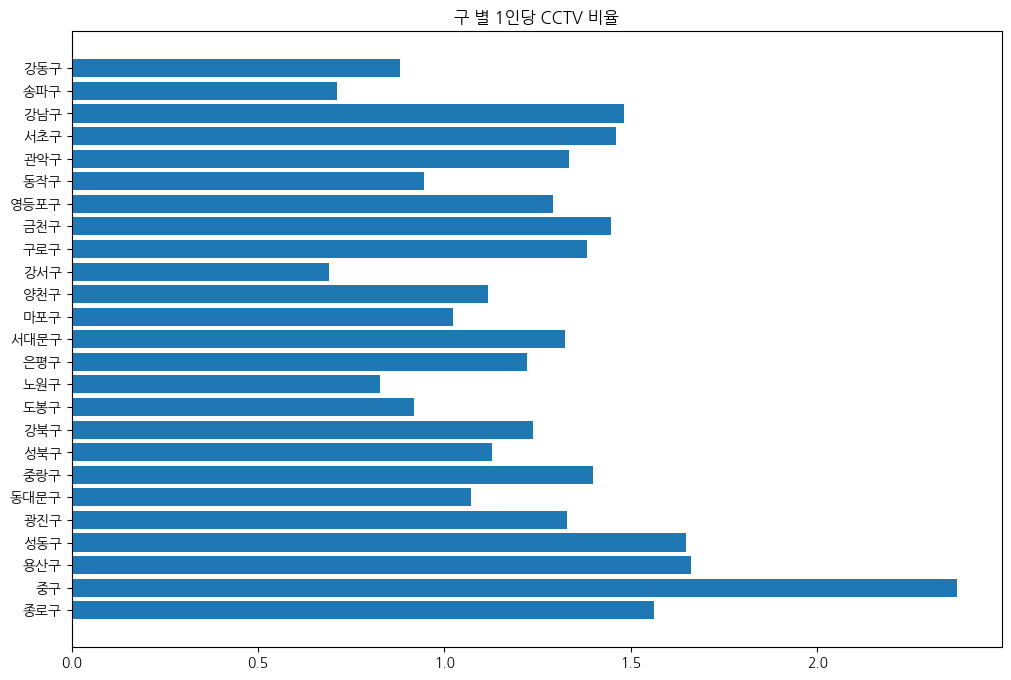

In [139]:
# 시각화 - 1인당 cctv 비율
# barh 

plt.figure(figsize=(12,8))

plt.barh(y=merge_df.index,width=merge_df["1인당 cctv 비율"])
g = plt.title("구 별 1인당 CCTV 비율")

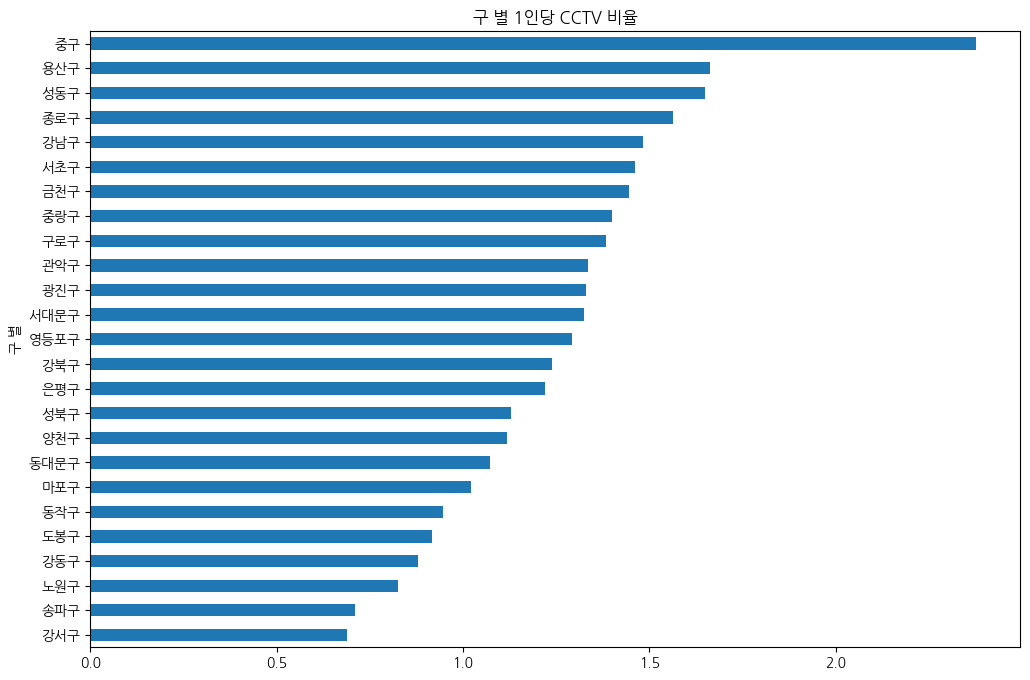

In [140]:
merge_df["1인당 cctv 비율"].sort_values().plot.barh(figsize=(12,8))
g = plt.title("구 별 1인당 CCTV 비율")

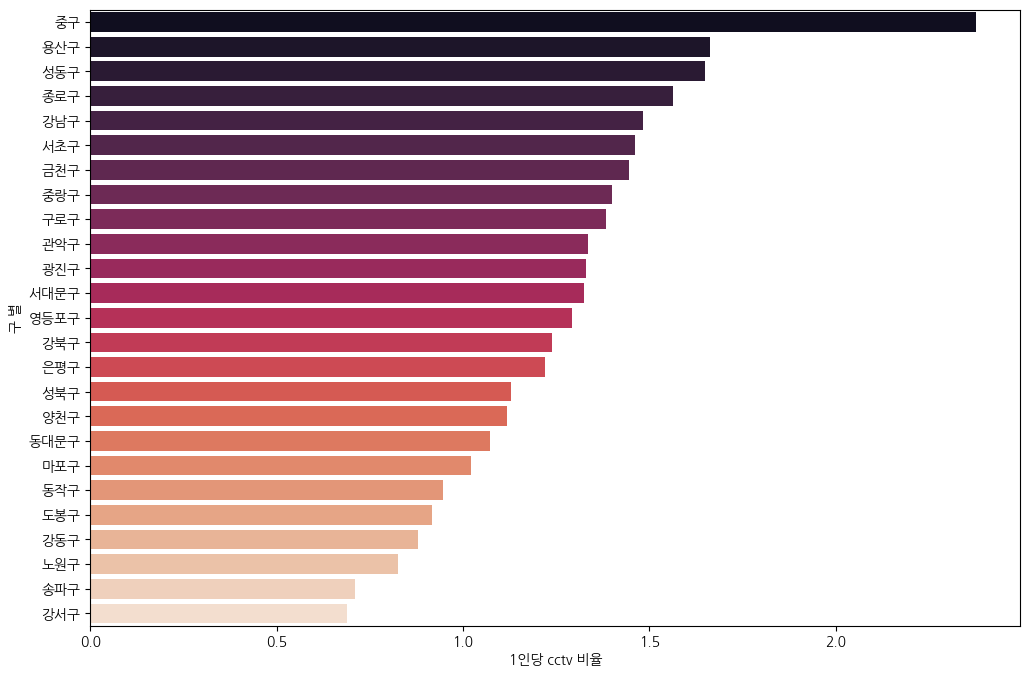

In [143]:
plt.figure(figsize=(12,8))
g = sns.barplot(data=merge_df, x="1인당 cctv 비율", y=merge_df.index, order=merge_df["1인당 cctv 비율"].sort_values(ascending=False).index, palette="rocket")

In [159]:
crime_df = pd.read_excel("./resources/5대범죄.xlsx", skiprows=[0,1,2,4], usecols="B:D")
crime_df.head()

,자치구별(2),발생,검거
0,종로구,2981,3485
1,중구,3348,2465
2,용산구,3021,2268
3,성동구,2023,1411
4,광진구,3424,2333


In [160]:
crime_df.columns

Index(['자치구별(2)', '발생', '검거'], dtype='object')

In [162]:
# 컬럼명 : 구 별, 범죄자, 검거건
crime_df.columns = ["구 별", "범죄건", "검거건"]
crime_df.head()

,구 별,범죄건,검거건
0,종로구,2981,3485
1,중구,3348,2465
2,용산구,3021,2268
3,성동구,2023,1411
4,광진구,3424,2333


In [163]:
# index 변경 : 구 별
crime_df.set_index("구 별",inplace=True)

In [165]:
# 검거율 = 검거건 / 범죄건 * 100

crime_df["검거율"] = crime_df["검거건"] / crime_df["범죄건"] * 100

In [167]:
crime_df.head()

,범죄건,검거건,검거율
구 별,,,
종로구,2981,3485,116.907078
중구,3348,2465,73.626045
용산구,3021,2268,75.074479
성동구,2023,1411,69.747899
광진구,3424,2333,68.136682


In [168]:
# merge_df와 crime_df 병합

# merge_df : on => 동일컬럼
merge_crime_df = pd.merge(merge_df, crime_df, left_index=True, right_index=True)
merge_crime_df.head()

,총인구,한국인,외국인,2021년,2022년,2023년,2024년,2020년 이전,cctv 총계,1인당 cctv 비율,범죄건,검거건,검거율
구 별,,,,,,,,,,,,,
종로구,149608,138336,11272,86.0,234.0,924.0,322.0,773.0,2339.0,1.563419,2981,3485,116.907078
중구,131214,120544,10670,416.0,137.0,135.0,593.0,1837.0,3118.0,2.376271,3348,2465,73.626045
용산구,217194,203854,13340,431.0,457.0,411.0,629.0,1681.0,3609.0,1.661648,3021,2268,75.074479
성동구,281289,273669,7620,294.0,170.0,320.0,204.0,3650.0,4638.0,1.648838,2023,1411,69.747899
광진구,348652,331963,16689,744.0,276.0,348.0,954.0,2314.0,4636.0,1.329693,3424,2333,68.136682


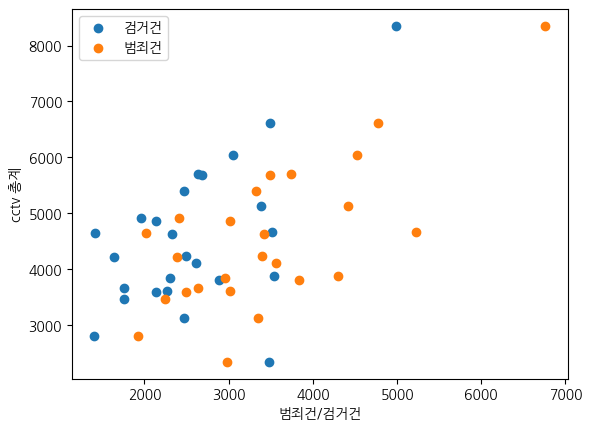

In [170]:
# cctv총계와 검거건과의 관계
# cctv총계와 범죄건과의 관계
# scatter plot

plt.scatter(x=merge_crime_df["검거건"], y=merge_crime_df["cctv 총계"])
plt.scatter(x=merge_crime_df["범죄건"], y=merge_crime_df["cctv 총계"])
plt.xlabel("범죄건/검거건")
plt.ylabel("cctv 총계")
g = plt.legend(["검거건","범죄건"])

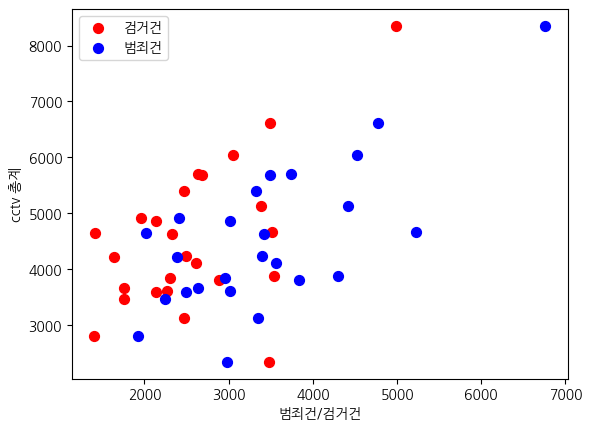

In [171]:
ax1 = merge_crime_df.plot.scatter(x="검거건",y="cctv 총계",color="red", s=50)
merge_crime_df.plot.scatter(x="범죄건",y="cctv 총계",ax = ax1, color="blue", s=50)
plt.legend(["검거건", "범죄건"])
g = plt.xlabel("범죄건/검거건")

<Axes: xlabel='범죄건', ylabel='cctv 총계'>

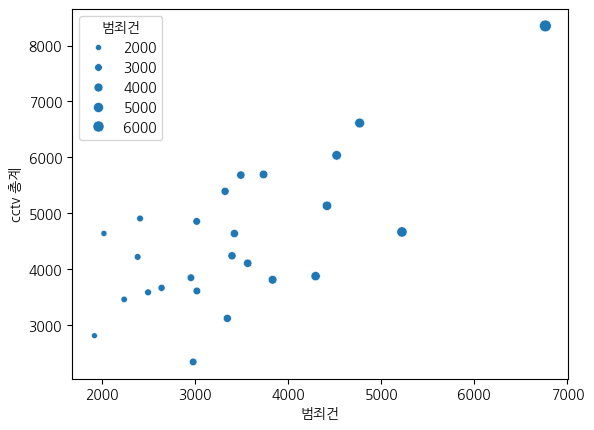

In [173]:
sns.scatterplot(data=merge_crime_df,x="범죄건",y="cctv 총계",size=merge_crime_df["범죄건"])

<Axes: xlabel='검거건', ylabel='cctv 총계'>

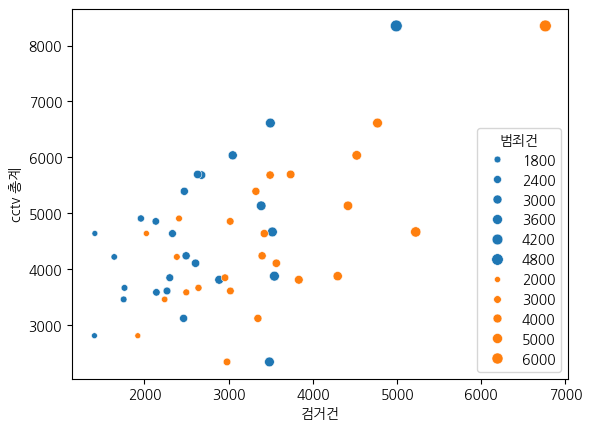

In [175]:
sns.scatterplot(data=merge_crime_df, x="검거건",y="cctv 총계",size=merge_crime_df["검거건"])
sns.scatterplot(data=merge_crime_df, x="범죄건",y="cctv 총계",size=merge_crime_df["범죄건"])